## **Algoritmo de aprendizaje Q (Q-learning)**

Algoritmo de aprendizaje Q para ayudar al agente a encontrar el camino más corto hacia la salida (cuadro verde), empezando desde cualquier punto. Los cuadros rojos simulan como si fuesen huecos por donde caería el agente.

**Nota:** Se toma las columnas y filas inicialmente desde 0, por eso las columnas van desde 0 hasta 4 y las filas desde 0 hasta 3.

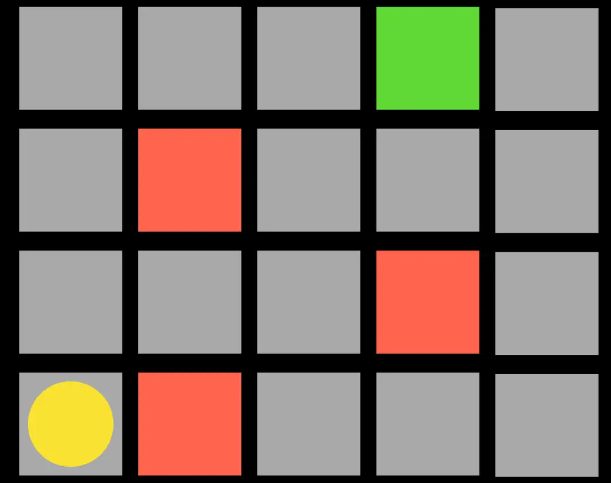

In [ ]:
# TODO
#importar librerias
import numpy as np

#Definir la forma del ambiente (i.e., los estados)
environment_rows = 4
environment_columns = 5
q_values = np.zeros((environment_rows, environment_columns, 4))

#Definir acciones
#codigo numérico de las acciones: 0 = Arriba, 1 = Derecha, 2 = Abajo, 3 = Izquierda
actions = ['up', 'right', 'down', 'left']

#Crear un arreglo 2D de numpy para almacenar las recompensas de cada estado
rewards = np.full((environment_rows, environment_columns), -100.)
rewards[0, 3] = 100. #Recompensa (i.e., el objetivo) damos valor de 100

#Definir los estados por donde se puede transitar de acuerdo a la figura
aisles = {} #guardo las localizaciones de la zona transitable en un diccionario
aisles[0] = [0, 1, 2, 4]
aisles[1] = [0, 2, 3, 4]
aisles[2] = [0, 1, 2, 4]
aisles[3] = [0, 2, 3, 4]

#Recompensa de los pasillos (cuadros blancos) -1
for row_index in range(0, 4):
    for column_index in aisles[row_index]:
        rewards[row_index, column_index] = -1

#Imprimo la matriz de recompensas
for row in rewards:
    print(row)

[ -1.  -1.  -1. 100.  -1.]
[  -1. -100.   -1.   -1.   -1.]
[  -1.   -1.   -1. -100.   -1.]
[  -1. -100.   -1.   -1.   -1.]


In [ ]:
#Función que determina si estoy en un estado terminal
def is_terminal_state(current_row_index, current_column_index):
  #Si la recompensa para esta localización es -1 no estoy en un estado terminal (i.e., es un 'cuadro blanco')
  if rewards[current_row_index, current_column_index] == -1.:
    return False
  else:
    return True

#Definir la función que escoge una localización aleatoria no terminal inicial
def get_starting_location():
    #fila y columna aleatoria
    current_row_index = np.random.randint(environment_rows)
    current_column_index = np.random.randint(environment_columns)
    #continuar escogiendo aleatoriamente hasta encontrar un estado no temrinal
    while is_terminal_state(current_row_index, current_column_index):
        current_row_index = np.random.randint(environment_rows)
        current_column_index = np.random.randint(environment_columns)
    return current_row_index, current_column_index

#Defino un algoritmo epsilon greedy para elegir la siguiente accion (i.e., donde moverme)
def get_next_action(current_row_index, current_column_index, epsilon):
    #Si un numero aleatorio es menor que epsilon, escoger el mejor valor de la tabla Q para este estado
    if np.random.random() < epsilon:
        return np.argmax(q_values[current_row_index, current_column_index])
    else: #de lo contrario escoja aleatoriamente
        return np.random.randint(4)

#Función que nos lleva al siguiente estado basado en la accion tomada
def get_next_location(current_row_index, current_column_index, action_index):
    new_row_index = current_row_index
    new_column_index = current_column_index
    if actions[action_index] == 'up' and current_row_index > 0:
        new_row_index -= 1
    elif actions[action_index] == 'right' and current_column_index < environment_columns - 1:
        new_column_index += 1
    elif actions[action_index] == 'down' and current_row_index < environment_rows - 1:
        new_row_index += 1
    elif actions[action_index] == 'left' and current_column_index > 0:
        new_column_index -= 1
    return new_row_index, new_column_index

#Definir una función que obtendrá la ruta más corta entre cualquier ubicación
def get_shortest_path(start_row_index, start_column_index):
    #Si no es una posición valida retornar inmediatamente
    if is_terminal_state(start_row_index, start_column_index):
        return []
    else: #Si es una localización legal
        current_row_index, current_column_index = start_row_index, start_column_index
        shortest_path = []
        shortest_path.append([current_row_index, current_column_index])
        #continuar moviendose a lo largo del camino hasta llegar al objetivo (i.e., localización del empaquetador)
        while not is_terminal_state(current_row_index, current_column_index):
            #tomo la mejor accion
            action_index = get_next_action(current_row_index, current_column_index, 1.)
            #me muevo a la siguiente localización del camino más corto y agrego la nueva localizacion a la lista
            current_row_index, current_column_index = get_next_location(current_row_index, current_column_index, action_index)
            shortest_path.append([current_row_index, current_column_index])
    return shortest_path

In [ ]:
#Parametros de entrenamiento
epsilon = 0.9 #del algoritmo epsilon greedy
discount_factor = 0.9 #factor de descuento de recompensa futura
learning_rate = 0.9 #tasa de aprendizaje

#1000 episodes de entrenamiento
for episode in range(1000):
    #localización de inicio
    row_index, column_index = get_starting_location()

    # continuar tomando acciones (es decir, moviéndose) hasta que lleguemos a un estado terminal
    # (es decir, hasta que lleguemos al área de empaque del artículo o nos estrellemos contra una
    # ubicación de almacenamiento del artículo)
    while not is_terminal_state(row_index, column_index):
        #elegir accion
        action_index = get_next_action(row_index, column_index, epsilon)

        #realizar la acción escogida y transitar al siguiente estado
        old_row_index, old_column_index = row_index, column_index #almaceno los indices viejos
        row_index, column_index = get_next_location(row_index, column_index, action_index)

        #recibo recompensa por moverme al siguiente estado y calculo los elementos de la funcion Q
        reward = rewards[row_index, column_index]
        old_q_value = q_values[old_row_index, old_column_index, action_index]
        temporal_difference = reward + (discount_factor * np.max(q_values[row_index, column_index])) - old_q_value

        #Actualizo el valor Q
        new_q_value = old_q_value + (learning_rate * temporal_difference)
        q_values[old_row_index, old_column_index, action_index] = new_q_value

print('Entrenamiento Completo!')

Entrenamiento Completo!


In [ ]:
#Mostrar algunas rutas más cortas
print(get_shortest_path(3, 0)) #comenzando en fila 3, columna 9
print(get_shortest_path(2, 4)) # fila 5, columna 0
print(get_shortest_path(3, 2)) # fila 9, columna 5

[[3, 0], [2, 0], [2, 1], [2, 2], [1, 2], [0, 2], [0, 3]]
[[2, 4], [1, 4], [0, 4], [0, 3]]
[[3, 2], [2, 2], [1, 2], [0, 2], [0, 3]]
